# Instance Segmentation

In this tutorial, we will perform Instance Segmentation inference with MMDetection  .

## Install MMDetection

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 2.0/2.0 GB 126.6 MB/s eta 0:00:01tcmalloc: large alloc 2041339904 bytes == 0x3050000 @  0x7f13ea9b5680 0x7f13ea9d6824 0x5b3128 0x5bbc90 0x5f714c 0x64d800 0x527022 0x504866 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x5f5ee6 0x56bbe1 0x569d8a 0x5f60c3 0x56cc92 0x569d8a 0x5f60c3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 2.0/2.0 GB 48.7 MB/s eta 0:00:01tcmalloc: large alloc 2551676928 bytes == 0x7cb16000 @  0x7f13ea9b5680 0x7f13ea9d5da2 0x5f714c 0x64d800 0x527022 0x504866 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x5f5ee6 0x56bbe1 0x569d8a 0x5f60c3 0x56cc92 0x569d8a 0x5f60c3 

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
2.28.0
11.1
GCC 7.3


/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


## Perform Inference with An MMDetection Detector


In [ ]:
#creating directory -  checkpoints
!mkdir checkpoints

#copying Mask R-CNN and SOLOv2 model file in checkpoints directory
!wget -c https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
      -O checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth

!wget -c https://download.openmmlab.com/mmdetection/v2.0/solov2/solov2_x101_dcn_fpn_3x_coco/solov2_x101_dcn_fpn_3x_coco_20220513_214337-aef41095.pth \
      -O checkpoints/solov2_x101_dcn_fpn_3x_coco_20220513_214337-aef41095.pth

--2023-01-29 09:12:24--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.82.212, 163.181.82.214, 163.181.82.218, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.82.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177867103 (170M) [application/octet-stream]
Saving to: ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’

checkpoints/mask_rc 100%[===================>] 169.63M  96.7MB/s    in 1.8s    

2023-01-29 09:12:27 (96.7 MB/s) - ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’ saved [177867103/177867103]

--2023-01-29 09:12:27--  https://download.openmmlab.com/mmdetection/

In [ ]:
# Load a Mask R-CNN checkpoint of the pre-trained model and initialize the detector. 

#Importing dependencies
import mmcv
from mmcv.runner import load_checkpoint
from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# Choose to use a config and initialize the detector
config = 'configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py'

#comment Mask R-CNN config and uncomment SOLOv2 config
#config = 'configs/solov2/solov2_x101_dcn_fpn_3x_coco.py'

# Setup a checkpoint file to load
checkpoint = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# Comment Mask R-CNN checkpint and uncomment SOLOv2 checkpoint to load
#checkpoint = 'checkpoints/solov2_x101_dcn_fpn_3x_coco_20220513_214337-aef41095.pth'

# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config)

# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)

# Convert the model into evaluation mode
model.eval()

load checkpoint from local path: checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


MaskRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          




### Inference with the detector

Now, we will perform Inference on a sample image. The model is successfully created and loaded, let's see how good it is and plot the result. We use the high-level API inference_detector implemented in the MMDetection. This API is created to ease the inference process.

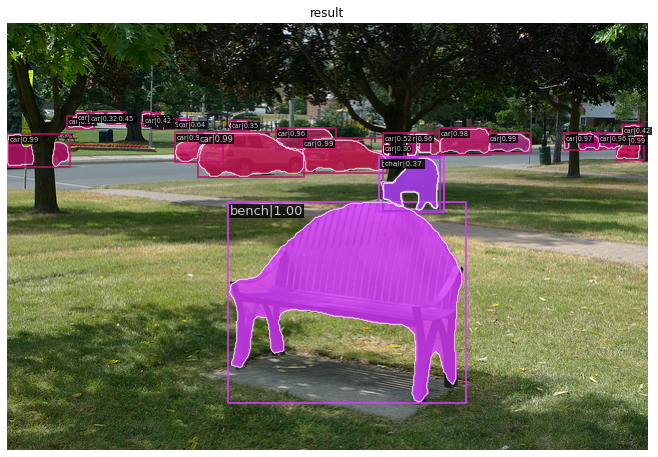

In [ ]:
# Use the detector to do inference
img = 'demo/demo.jpg'
result = inference_detector(model, img)

# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

#uncomment want to save result output image
#show_result_pyplot(model, img, result, score_thr=0.3, out_file='demo/result.jpg')

## Extract Label Ids, Bounding Box coordinate, confidence score and polygon points

Labels are class ids of every instance. The first 4 numbers in bboxes are left-top-x, left-top-y, right-bottom-x, right-bottom-y of the bounding boxes in rectangle shape. The last number of bboxes is confidence value of that instance. ret_mask contains polygon points.

In [ ]:
#Importing dependencies
import numpy as np
from mmdet.core import get_classes

#if only object detection
#bbox_result = result

#instance segmentation
bbox_result, segm_result = result

#Get infered label ids
labels = [np.full(bbox.shape[0], i, dtype=np.int32)for i, bbox in enumerate(bbox_result)]
labels = np.concatenate(labels)
#print(labels)

#Get bboxes (left, top, right, bottom, confidence)
bboxes = np.vstack(bbox_result)
#print(bboxes)

#Get segmentation polygon points
segms = segm_result
if segm_result is not None and len(labels) > 0:# non empty
  segms = mmcv.concat_list(segm_result)
  if isinstance(segms[0], torch.Tensor):
    segms = torch.stack(segms, dim=0).detach().cpu().numpy()
  else:
    segms = np.stack(segms, axis=0)

assert segms is None or segms.shape[0] == labels.shape[0], \
  'segms.shape[0] and labels.shape[0] should have the same length.'
assert segms is not None or bboxes is not None, \
  'segms and bboxes should not be None at the same time.'

#Polygon points
ret_mask = []
for i, mask in enumerate(segms):
  temp_mask = []
  from matplotlib.patches import Polygon
  from mmdet.core.mask.structures import bitmap_to_polygon
  contours, _ = bitmap_to_polygon(mask)
  ret_mask.append(contours)

# uncomment to check if numbers are equal
#print('Number of labels',len(labels))
#print('Number of bboxes',len(bboxes))
#print('Number of masks',len(ret_mask))


#To get labels, bboxes and segmentation points one by one
#can be easily modified to json, txt or other required format
info_zip = zip((labels), bboxes, ret_mask)

#Print required information
#for i in info_zip:
  #print(i)

'''
Output - Example

(0 ( Class id), 

array( Bounding Box - [2.3884398e+02 (left), 9.8713120e+01 (top), 2.4988625e+02 (right),
 1.0849440e+02 (bottom), 1.0323198e-01 (confidence)], dtype=float32), 

[array( Segmentation points - 
       [[242,  99],
       [242, 100],
       [241, 101],
       [240, 102],
       [240, 103],
       [239, 104],
       [239, 105],
       [239, 106],
       [239, 107],
       [240, 107],
       [241, 107],
       [242, 107],
       [243, 107],
       [244, 107],
       [245, 107],
       [246, 107],
       [247, 107],
       [247, 106],
       [248, 105],
       [248, 104],
       [247, 103],
       [246, 102],
       [245, 101],
       [244, 100],
       [243,  99]], dtype=int32)])
'''

'\nOutput - Example\n\n(0 ( Class id), \n\narray( Bounding Box - [2.3884398e+02 (left), 9.8713120e+01 (top), 2.4988625e+02 (right),\n 1.0849440e+02 (bottom), 1.0323198e-01 (confidence)], dtype=float32), \n\n[array( Segmentation points - \n       [[242,  99],\n       [242, 100],\n       [241, 101],\n       [240, 102],\n       [240, 103],\n       [239, 104],\n       [239, 105],\n       [239, 106],\n       [239, 107],\n       [240, 107],\n       [241, 107],\n       [242, 107],\n       [243, 107],\n       [244, 107],\n       [245, 107],\n       [246, 107],\n       [247, 107],\n       [247, 106],\n       [248, 105],\n       [248, 104],\n       [247, 103],\n       [246, 102],\n       [245, 101],\n       [244, 100],\n       [243,  99]], dtype=int32)])\n'

## Extracting objects by cropping images using Bounding Box coordinates

car


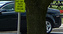

car


car


car


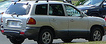

car


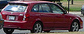

car


car


car


car


car


car


car


car


car


car


car


car


car


car


car


car


car


car


car


car


car


car


bench


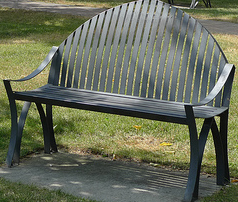

bench


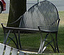

chair


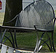

In [ ]:
#filter out the low confidence detections based on a certain threshold (0.3 in this case). - provide label index whose confidence is above 0.3
labels_impt = np.where(bboxes[:, -1] > 0.3)[0] 
#print(labels_impt)

#coco classes
classes = get_classes("coco")

#get label names
labels_impt_list = [labels[i] for i in labels_impt]
labels_class = [classes[i] for i in labels_impt_list]


# Importing Image class from PIL module
from PIL import Image

#All objects above thresold
for i in range(0, len(labels_impt)):

  #Opens a image in RGB mode
  im = Image.open(img)

  #Size of the image in pixels (size of original image)
  width, height = im.size

  #printing label class
  print(labels_class[i])
  

  #Setting the points for cropped image
  left = bboxes[labels_impt][i][0]
  top = bboxes[labels_impt][i][1]
  right = bboxes[labels_impt][i][2]
  bottom = bboxes[labels_impt][i][3]
  
  #Cropped image of above dimension
  #(It will not change original image)
  im1 = im.crop((left, top, right, bottom))

  # Shows the image in image viewer - also using PIL, we can save images
  display(im1)

##Image Demo
demo/image_demo.py - This script performs inference on a single image.


In [ ]:
#Upload an image and replace input path - /content/pexels-mikey-dabro-1002674.jpg config, checkpoint and output path

!python demo/image_demo.py /content/mmdetection/demo/demo.jpg \
    configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py \
    checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
    --out-file 'demo/result.jpg'

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
load checkpoint from local path: checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
/content/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Plea

##Video Demo

demo/video_demo.py - This script performs inference on a video.

In [ ]:
#replace input path, config, checkpoint and output path

!python demo/video_demo.py demo/demo.mp4 \
    configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py \
    checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
    --out demo/result.mp4

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
load checkpoint from local path: checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
[                                                  ] 0/67, elapsed: 0s, ETA:/content/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all t